
# DATA 101 — Clustering Demo (Session 2)

This notebook demonstrates:
- Supervised vs. Unsupervised quick recap
- k-Means clustering on synthetic data
- Evaluation with **inertia** and **silhouette score**
- Choosing **k** with the **elbow method**
- Practical considerations: scaling, initialization (`n_init`), random state


In [1]:

# Imports
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs, make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Make plots a bit larger
plt.rcParams["figure.figsize"] = (6,4)



## 1) Create a synthetic dataset (blobs)

We start with a simple, roughly spherical-cluster dataset that suits k-Means.


In [2]:

# Reproducibility
rng = 1

# Make synthetic "customer-like" data (3 clusters)
X_blobs, y_blobs = make_blobs(n_samples=600, centers=3, cluster_std=[1.0, 1.2, 0.8], random_state=rng)

# Put into a DataFrame for convenience
df_blobs = pd.DataFrame(X_blobs, columns=["feature_1", "feature_2"])
df_blobs["true_cluster"] = y_blobs

df_blobs.head()


,feature_1,feature_2,true_cluster
0,-2.536841,3.538703,0
1,-6.260333,-7.870374,2
2,-10.319758,-4.111359,1
3,-10.210871,-5.765896,1
4,-2.330806,4.393825,0



## 2) Scale features

K-Means is distance-based and **sensitive to scale**. Always standardize before clustering.


In [3]:

scaler = StandardScaler()
Xb = scaler.fit_transform(df_blobs[["feature_1", "feature_2"]].values)
Xb[:5]


array([[ 1.01751738,  1.14182702],
       [-0.00881039, -1.00495034],
       [-1.12773356, -0.2976391 ],
       [-1.09772042, -0.60896335],
       [ 1.07430812,  1.3027303 ]])


## 3) Fit k-Means (k=3)


In [4]:

kmeans3 = KMeans(n_clusters=3, n_init=10, random_state=rng)
labels3 = kmeans3.fit_predict(Xb)
inertia3 = kmeans3.inertia_
sil3 = silhouette_score(Xb, labels3)

print("Inertia (k=3):", round(inertia3, 2))
print("Silhouette (k=3):", round(sil3, 3))


Inertia (k=3): 66.38
Silhouette (k=3): 0.709


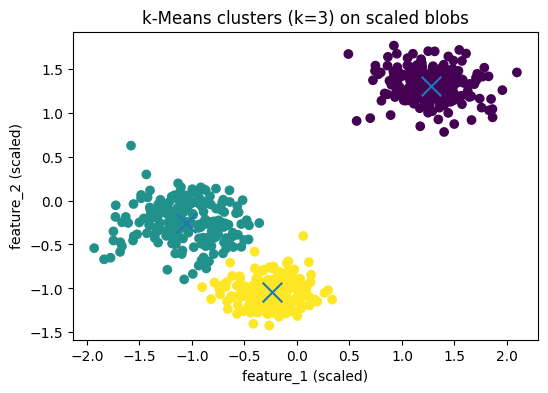

In [5]:

plt.scatter(Xb[:, 0], Xb[:, 1], c=labels3)
plt.scatter(kmeans3.cluster_centers_[:,0], kmeans3.cluster_centers_[:,1], marker='x', s=200)
plt.title("k-Means clusters (k=3) on scaled blobs")
plt.xlabel("feature_1 (scaled)")
plt.ylabel("feature_2 (scaled)")
plt.show()



## 4) Choose *k* with the Elbow Method
Compute inertia for a range of *k* and look for the bend.


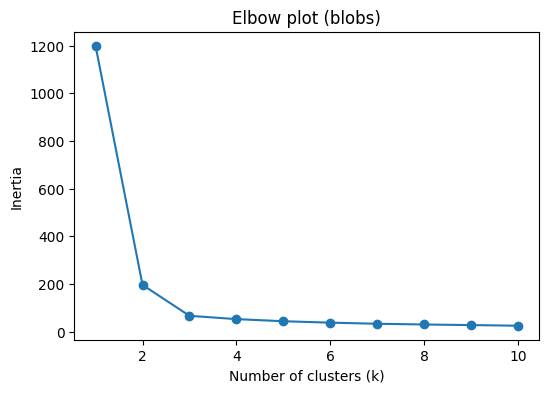

In [6]:

inertias = []
ks = range(1, 11)
for k in ks:
    km = KMeans(n_clusters=k, n_init=10, random_state=rng).fit(Xb)
    inertias.append(km.inertia_)

plt.plot(list(ks), inertias, 'o-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow plot (blobs)")
plt.show()



## 5) Silhouette Score across *k*
Higher is better. Use together with the elbow plot.


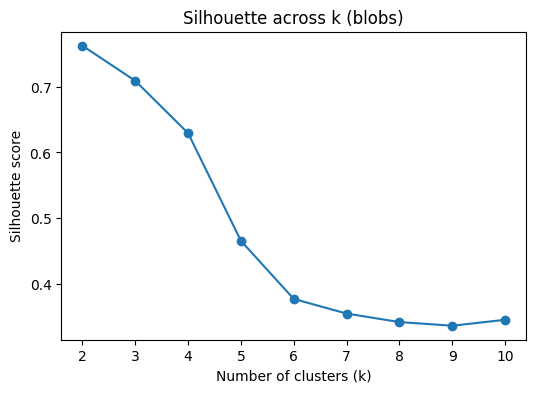

2.0

In [7]:

sils = []
ks2 = range(2, 11)  # silhouette not defined for k=1
for k in ks2:
    km = KMeans(n_clusters=k, n_init=10, random_state=rng).fit(Xb)
    lbls = km.labels_
    sils.append(silhouette_score(Xb, lbls))

plt.plot(list(ks2), sils, 'o-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette score")
plt.title("Silhouette across k (blobs)")
plt.show()

best_k = ks2[int(np.argmax(sils))]
float(best_k)



## 6) Limitation example: non-spherical clusters (two moons)

K-Means assumes compact, roughly spherical clusters. The **two moons** dataset violates this assumption.


Silhouette (moons, k=2): 0.493


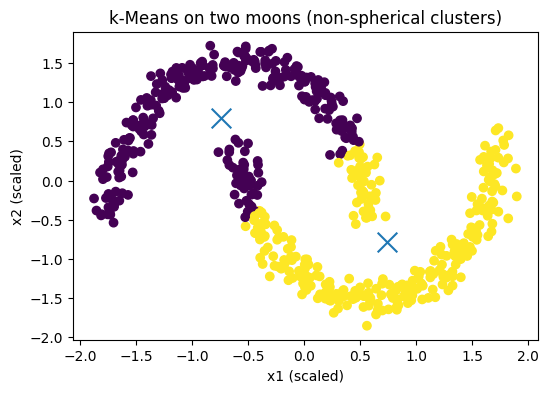

In [8]:

Xm, ym = make_moons(n_samples=600, noise=0.06, random_state=rng)
Xm = StandardScaler().fit_transform(Xm)

km_moons = KMeans(n_clusters=2, n_init=10, random_state=rng).fit(Xm)
labels_moons = km_moons.labels_
sil_moons = silhouette_score(Xm, labels_moons)

print("Silhouette (moons, k=2):", round(sil_moons, 3))

plt.scatter(Xm[:,0], Xm[:,1], c=labels_moons)
plt.scatter(km_moons.cluster_centers_[:,0], km_moons.cluster_centers_[:,1], marker='x', s=200)
plt.title("k-Means on two moons (non-spherical clusters)")
plt.xlabel("x1 (scaled)")
plt.ylabel("x2 (scaled)")
plt.show()
